# Convolutional Neural Network

### Importing the libraries

In [55]:
import platform
import tensorflow as tf
import matplotlib.pyplot as plt

In [56]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

Python version: 3.11.7
Tensorflow version: 2.16.1


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [57]:
img_height = 28
img_width = 28

In [58]:
def preprocess_image(image):
    """Preprocesses an image, considering transparency."""
    # Extract the alpha channel
    alpha_channel = image[..., -1]
    
    # Create a mask where alpha is present
    alpha_mask = tf.cast(alpha_channel > 0, tf.float32)
    
    # Create a white image with the same shape as the input image
    white_image = tf.ones_like(image[..., :3]) * 255.0
    
    # Combine the white image with the original image based on the alpha mask
    processed_image = white_image * alpha_mask[..., None] + image[..., :3] * (1 - alpha_mask[..., None])
    
    # Convert the processed image to grayscale
    grayscale_image = tf.image.rgb_to_grayscale(processed_image)
    
    # Normalize (optional)
    grayscale_image = grayscale_image / 255.0
    
    return grayscale_image

In [59]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/train-set',
    image_size=(img_height, img_width),
    color_mode = 'rgba',
    batch_size=32
)

Found 80010 files belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


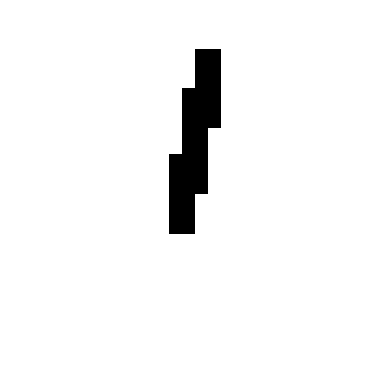

2024-03-17 17:46:56.320535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [60]:
# Plot the first image
for images, labels in training_set.take(1):  # Only take the first batch
    if len(images) > 0:
        plt.figure()
        plt.imshow(images[0])
        plt.axis('off')
        plt.show()
    else:
        print("No images found in the dataset.")

In [61]:
training_set = training_set.map(lambda image, label: (preprocess_image(image), label))

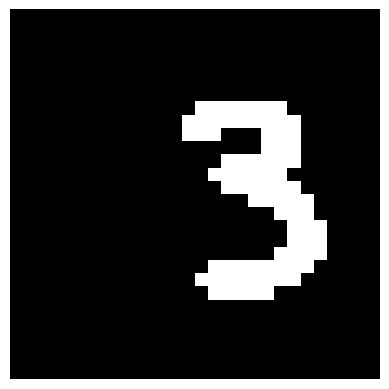

2024-03-17 17:46:56.526912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [62]:
# Plot the first image
for images, labels in training_set.take(1):  # Only take the first batch
    if len(images) > 0:
        plt.figure()
        plt.imshow(images[0], cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        print("No images found in the dataset.")

### Preprocessing the Test set

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/test-set',
    image_size=(img_height, img_width),
    color_mode = 'rgba',
    batch_size=32
)

Found 27720 files belonging to 10 classes.


In [64]:
test_set = test_set.map(lambda image, label: (preprocess_image(image), label))

## Part 2 - Building the CNN

### Initialising the CNN

In [65]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [66]:
cnn.add(tf.keras.layers.Conv2D(filters=25, kernel_size=3, activation='relu', input_shape=[28, 28,1]))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Step 2 - Pooling

In [67]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [68]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [69]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [70]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [71]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Step 5 - Output Layer

In [72]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

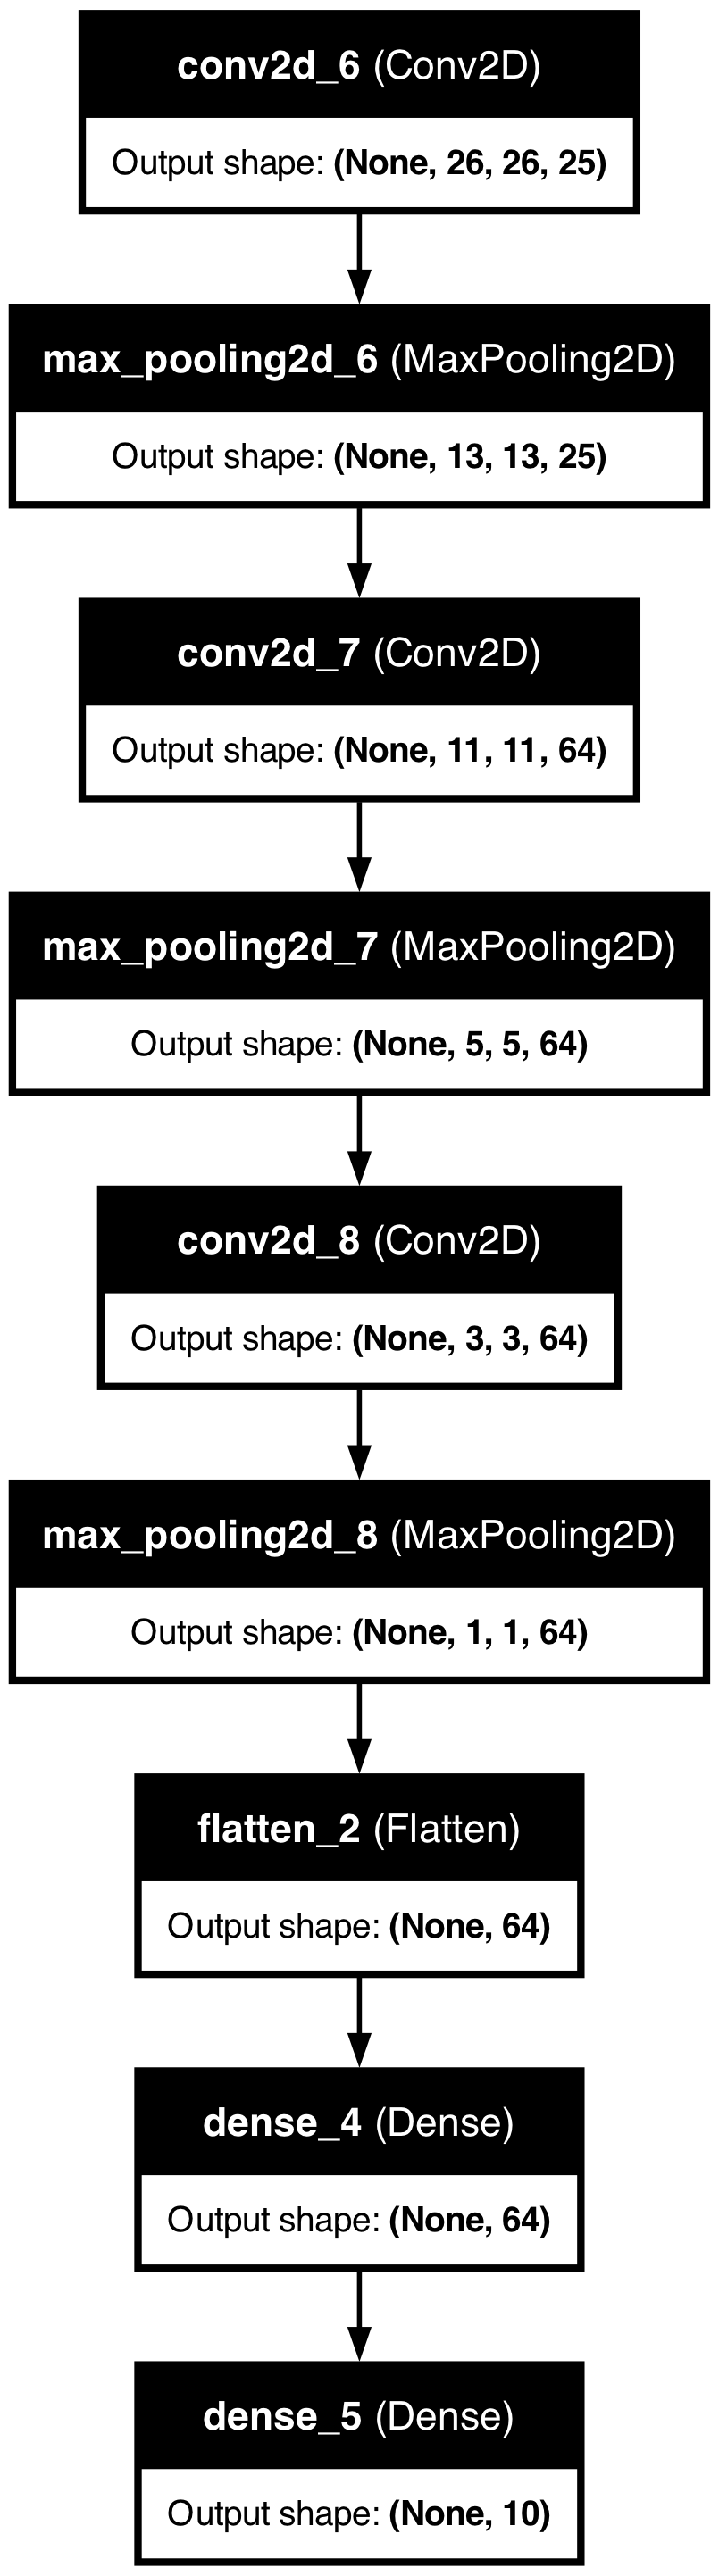

In [73]:
tf.keras.utils.plot_model(
    cnn,
    show_shapes=True,
    show_layer_names=True,
)

## Part 3 - Training the CNN

### Compiling the CNN

In [74]:
cnn.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [75]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8984 - loss: 0.3045 - val_accuracy: 0.9929 - val_loss: 0.0222
Epoch 2/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9986 - loss: 0.0048 - val_accuracy: 0.9950 - val_loss: 0.0127
Epoch 3/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9989 - val_loss: 0.0029
Epoch 4/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9972 - val_loss: 0.0081
Epoch 5/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9974 - val_loss: 0.0078
Epoch 6/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 1.0000 - loss: 1.6291e-04 - val_accuracy: 0.9984 - val_loss: 0.0044
Epoch 7/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 1.0000 - loss: 3.2234e-06 - val_accuracy: 0.9987 - val_loss: 0.0038
Epoch 8/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 1.0000 -

## Part 4 - Making a single prediction

In [76]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/digit_question_2.png', target_size = (28, 28),color_mode = "rgba",)
test_image = image.img_to_array(test_image)
# Preprocess the image
processed_image = preprocess_image(test_image)

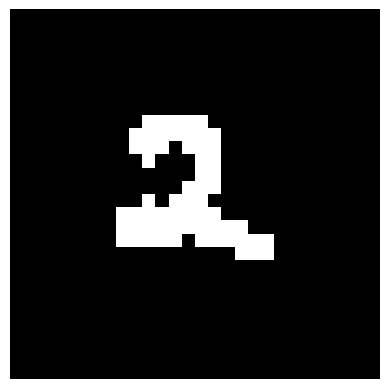

In [77]:
plt.figure()
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()

In [78]:
processed_image = image.img_to_array(processed_image)
processed_image = np.expand_dims(processed_image, axis = 0)

result = cnn.predict(processed_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[1.3330224e-15, 3.1217692e-10, 9.9283892e-01, 7.1587106e-03,
        4.4014365e-07, 5.1536510e-08, 8.0688333e-15, 1.7835002e-06,
        3.5585241e-12, 1.1444261e-07]], dtype=float32)

In [79]:
np.argmax(result[0])

2

In [80]:
tf.saved_model.save(
    cnn,
    'models',
    signatures=None
)

INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
